In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats

$$\sigma$$

In [3]:
# simplest elo rating calculator
def compute_elo_change(R1, R2, w1):
    K = 32
    n = 400
    E1 = 1 / (1 + 10**((R2 - R1)/400))
    E2 = 1 / (1 + 10**((R1 - R2)/400))
    S1 = 1 if w1 else 0
    S2 = 1 - S1
    R1 = R1 + K * (S1 - E1)
    R2 = R2 + K * (S2 - E2)
    return R1, R2

Text(0.5, 1.0, 'Two prior distributions')

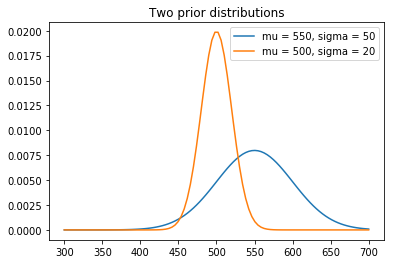

In [4]:
# Gaussian distributions

x = np.linspace(300, 700, 100)

mu = 550
sig = 50
plt.plot(x, stats.norm.pdf(x, mu, sig), label='mu = {}, sigma = {}'.format(mu, sig))

mu = 500
sig = 20
plt.plot(x, stats.norm.pdf(x, mu, sig), label='mu = {}, sigma = {}'.format(mu, sig))

plt.legend()

plt.title('Two prior distributions')

Text(0.5, 1.0, 'Logistic distributions')

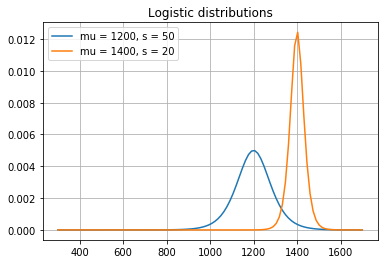

In [37]:
# Logistic distributions

x = np.linspace(300, 1700, 100)

mu = 1200
sig = 50
plt.plot(x, stats.logistic.pdf(x, mu, sig), label='mu = {}, s = {}'.format(mu, sig))

mu = 1400
sig = 20
plt.plot(x, stats.logistic.pdf(x, mu, sig), label='mu = {}, s = {}'.format(mu, sig))

plt.legend()
plt.grid()

plt.title('Logistic distributions')

In [25]:
1 / (1 + 10 ** (200/400))

0.2402530733520421

$$R'_A = R_A + \underbrace{\left(\sqrt{\frac{1}{\phi_A^2 + \sigma'^2} + \frac{1}{v}}\right)^{-1}}_\text{$\phi'_A$} \sum_{j=1}^mg(\phi_j)(S_j - E(S_j|R_A, R_j,\phi_j))$$


$$\phi_A$$

Text(0.5, 1.0, 'CDF of player B evaluated at Elo of A')

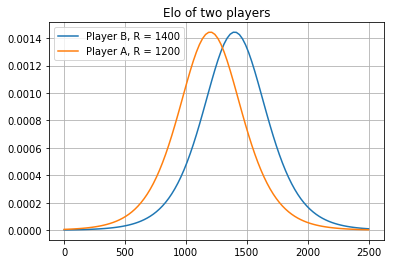

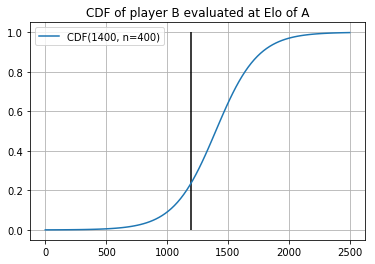

In [16]:
# simplest elo rating calculator
def compute_elo_change(R1, R2, w1):
    K = 32
    n = 400
    E1 = 1 / (1 + 10**((R2 - R1)/400))
    E2 = 1 / (1 + 10**((R1 - R2)/400))
    S1 = 1 if w1 else 0
    S2 = 1 - S1
    R1 = R1 + K * (S1 - E1)
    R2 = R2 + K * (S2 - E2)
    return R1, R2

x = np.linspace(0, 2500, 100)
plt.figure()

mu = 1400
sig = 173
plt.plot(x, stats.logistic.pdf(x, mu, sig), label='Player B, R = 1400')

mu = 1200
sig = 173
plt.plot(x, stats.logistic.pdf(x, mu, sig), label='Player A, R = 1200')
plt.legend()
plt.grid()
plt.title('Elo of two players')

plt.figure()
plt.vlines(1200, 0, 1)
plt.plot(x, stats.logistic.cdf(x, 1400, 173), label = 'CDF(1400, n=400)')
plt.legend()
plt.grid()
plt.title('CDF of player B evaluated at Elo of A')

$$R_A$$

$$R_B$$

$$CDF(R_B)$$

$$\sigma$$

$$S_A$$

$$\beta = n/2$$

$$ s = n/ln(10)$$

$$E_A = \frac{1}{1 + 10 ^{(R_B - R_A)/n}}$$

$$R'_A = R_A + K(S_A - E_A)$$

$$\mu_0$$
$$\sigma_0$$

$$r_1$$

$$R_1 = 10 ^ {(r_1/400)}$$

$$R_2 = 10 ^ {(r_2/400)}$$

$$E_1 = \frac{R_1}{R_1 + R_2}$$

$$ r_1 = r1 + K * (S_1 - E_1)$$

$$R'_A = 1200 + 32 * \left(1 - \frac{1}{1 + 10^{(1200-1200)/400}}\right)  = 1216$$
$$R'_B = 1200 + 32 * \left(1 - \frac{1}{0 + 10^{(1200-1200)/400}}\right)  = 1184$$

$$E_A = \frac{1}{1 + 10 ^{(R_B - R_A)/n}}$$

$$s \sim \mathcal{N}(s,\tau^{2(t' - t)})$$

Logistic CDF:

$$F(x; \mu, s) = \frac{1}{1 + e^{-\frac{x - \mu}{s}}}$$

Rewriting for elo:

$$ \frac{1}{1 + e^{-\frac{R_1-R_2}{s}}}$$

Gaussian CDF:

$$\frac{1}{2}\left[1 + erf\left(\frac{x - \mu}{\sigma\sqrt 2}\right)\right]$$

where

$$erf(z) = \frac{2}{\sqrt \pi} \int_0^z e^{-r^2} dt$$

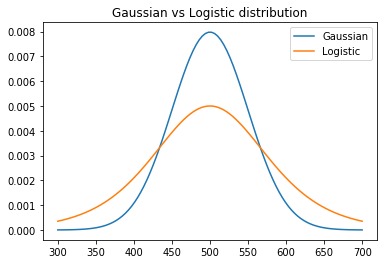

In [28]:
# compare Gaussian and Logistic

x = np.linspace(300, 700, 100)

mu = 500
sig = 50
plt.plot(x, stats.norm.pdf(x, mu, sig), label='Gaussian')

plt.plot(x, stats.logistic.pdf(x, loc=mu, scale=sig), label='Logistic')
plt.legend()
_ = plt.title('Gaussian vs Logistic distribution')

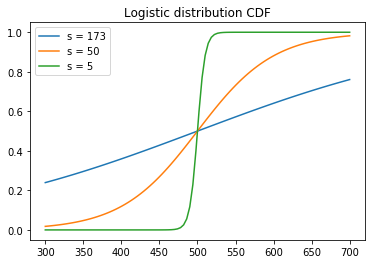

In [14]:
# compare Gaussian and Logistic

x = np.linspace(300, 700, 100)

mu = 500
sig = 173
#plt.plot(x, stats.norm.cdf(x, mu, sig), label='Gaussian')
plt.plot(x, stats.logistic.cdf(x, loc=mu, scale=sig), label='s = 173')

sig = 50
#plt.plot(x, stats.norm.cdf(x, mu, sig), label='Gaussian')
plt.plot(x, stats.logistic.cdf(x, loc=mu, scale=sig), label='s = 50')


sig = 5
#plt.plot(x, stats.norm.cdf(x, mu, sig), label='Gaussian')
plt.plot(x, stats.logistic.cdf(x, loc=mu, scale=sig), label='s = 5')

plt.legend()
_ = plt.title('Logistic distribution CDF')

Glicko:

$$R_{new} = R_{old} + K \sum g  (S- E)$$

$$R_{new} = R_{old} + \frac{q}{\frac{1}{RD^2}+\frac{1}{d^2}}\sum_{i=1}^m g(RD_i)(S_i - E(S|R_{old}, R_i, RD_i))$$

Text(0, 0.5, 'rating deviation RD')

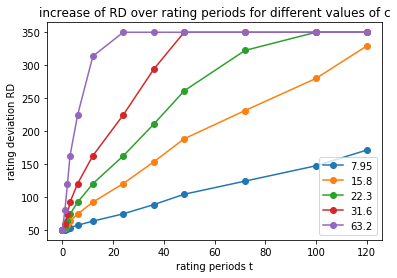

In [50]:
# c = sqrt(RD_unr^2 - RD-nom^2 / t)

rd_old = 50

def get_rd_new(rd_old, c, t):
    sq = np.sqrt(rd_old**2 + c**2*t)
    rd_new = min(sq, 350)
    return rd_new

cs = [7.95, 15.8, 22.3, 31.6, 63.2]
ts = [0, 1, 2, 3, 6, 12, 24, 36, 48, 72, 100, 120]
for c in cs:
    rd_new = [rd_old]
    for t in ts[1:]:
        rd_new.append(get_rd_new(rd_new[-1], c, t))
    plt.plot(ts, rd_new, '-o', label=c)
    
plt.legend()
plt.title('increase of RD over rating periods for different values of c')
plt.xlabel('rating periods t')
plt.ylabel('rating deviation RD')